In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# DATA PREPARATION

In [ ]:
data=pd.read_csv("Unemployment in India.csv")
data.shape

(754, 7)

In [ ]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 41.4+ KB


In [ ]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
data.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [ ]:
data[data.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
360,NaN,NaT,NaN,NaN,NaN,NaN,NaN
361,NaN,NaT,NaN,NaN,NaN,NaN,NaN
362,NaN,NaT,NaN,NaN,NaN,NaN,NaN
363,NaN,NaT,NaN,NaN,NaN,NaN,NaN
364,NaN,NaT,NaN,NaN,NaN,NaN,NaN
365,NaN,NaT,NaN,NaN,NaN,NaN,NaN
366,NaN,NaT,NaN,NaN,NaN,NaN,NaN
367,NaN,NaT,NaN,NaN,NaN,NaN,NaN
368,NaN,NaT,NaN,NaN,NaN,NaN,NaN
369,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [ ]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

Visualization: Visualize the data to gain insights and identify patterns.

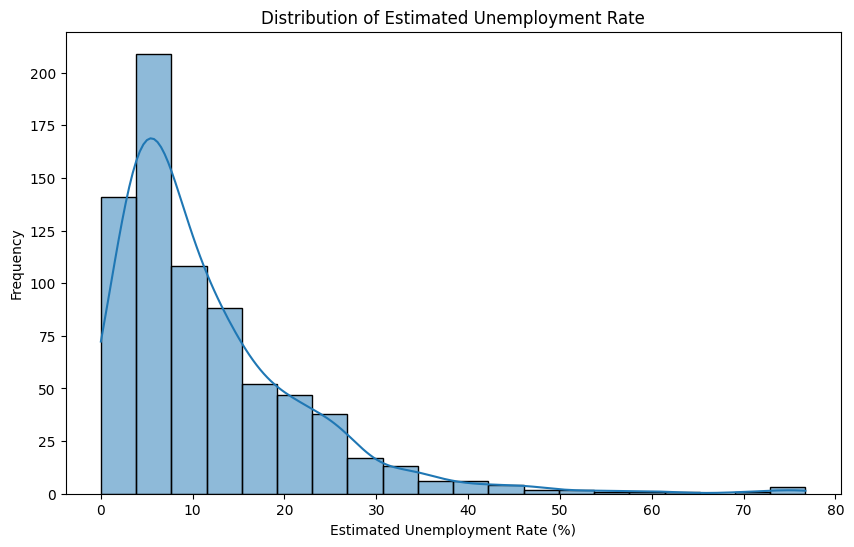

In [ ]:
# Distribution of Estimated Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title('Distribution of Estimated Unemployment Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

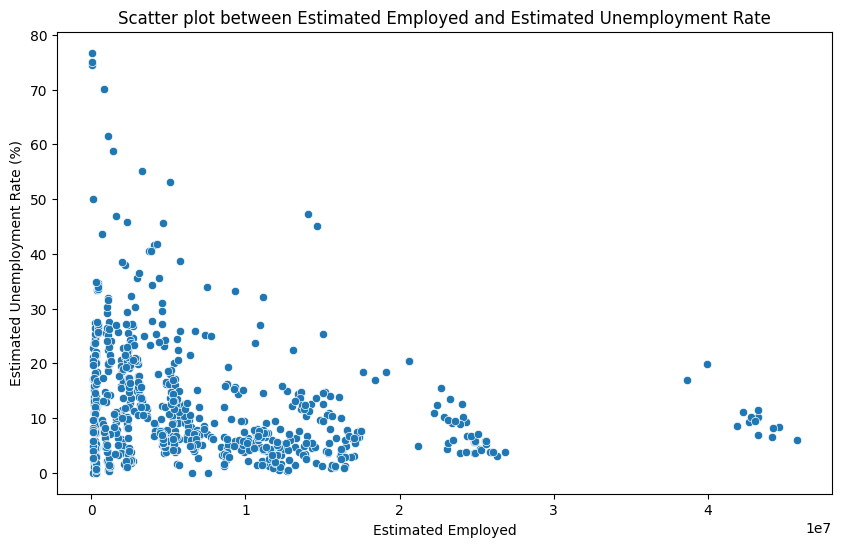

In [ ]:
# Scatter plot between Estimated Employed and Estimated Unemployment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Scatter plot between Estimated Employed and Estimated Unemployment Rate')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

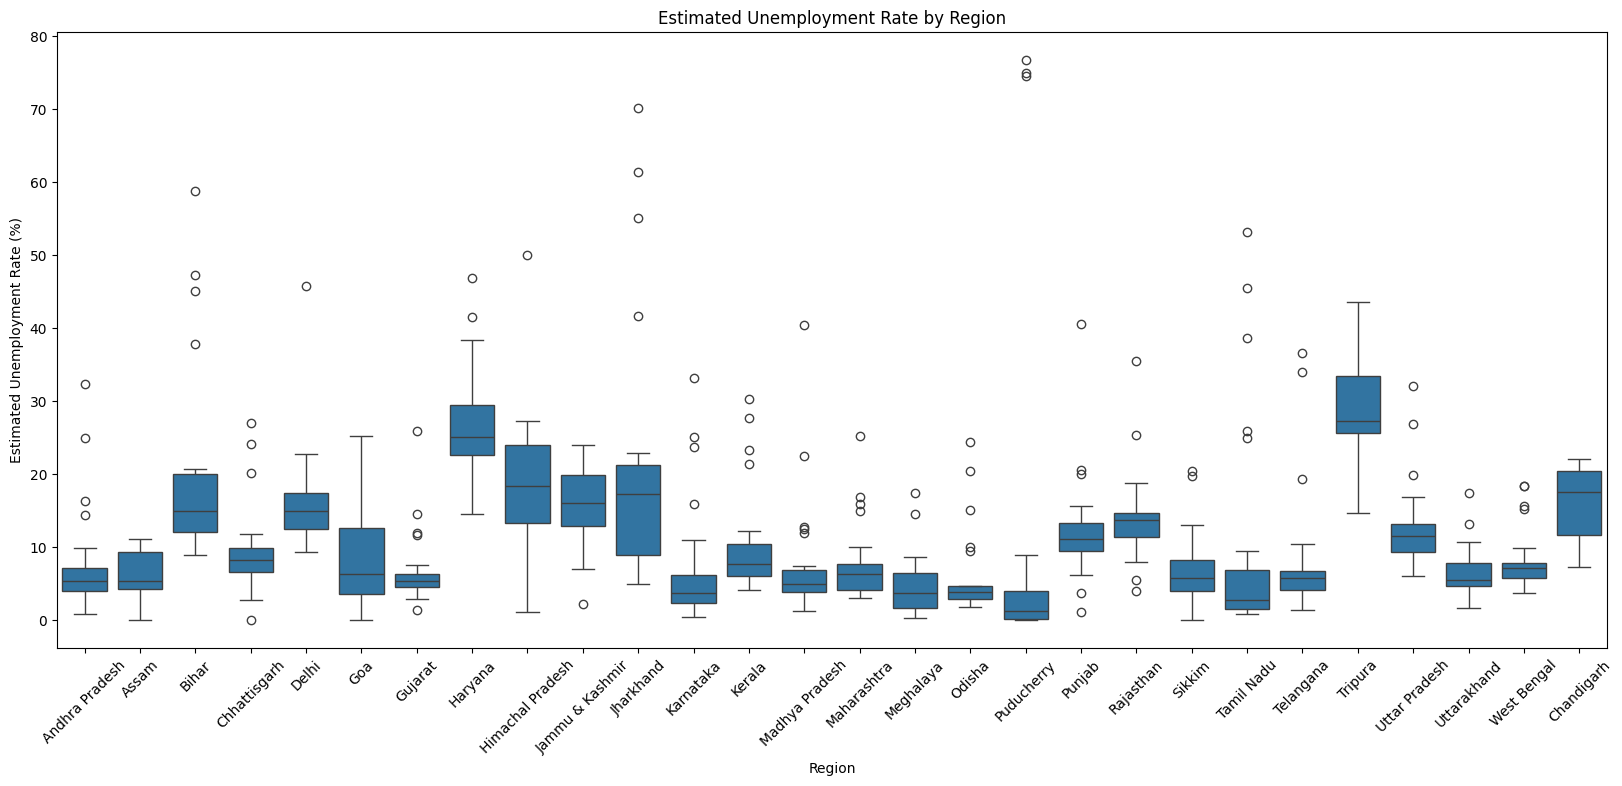

In [ ]:
# Box plot of Estimated Unemployment Rate by Region
plt.figure(figsize=(20,8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# REGIONAL ANALYSIS

Group Data by Region: Group the dataset by the "Region" column to segregate data for each region.

In [ ]:
# Group data by region
grouped_data = data.groupby('Region')

Aggregate Metrics: Calculate aggregated metrics such as mean, median, or sum for each region to understand the regional trends.

In [ ]:
# Calculate mean unemployment rate by region
mean_unemployment_rate = grouped_data['Estimated Unemployment Rate (%)'].mean()

# Calculate median employed by region
median_employed = grouped_data['Estimated Employed'].median()

# Calculate mean labor participation rate by region
mean_labor_participation_rate = grouped_data['Estimated Labour Participation Rate (%)'].mean()

Visualize Regional Trends: Visualize the regional trends using appropriate plots such as bar plots or box plots.

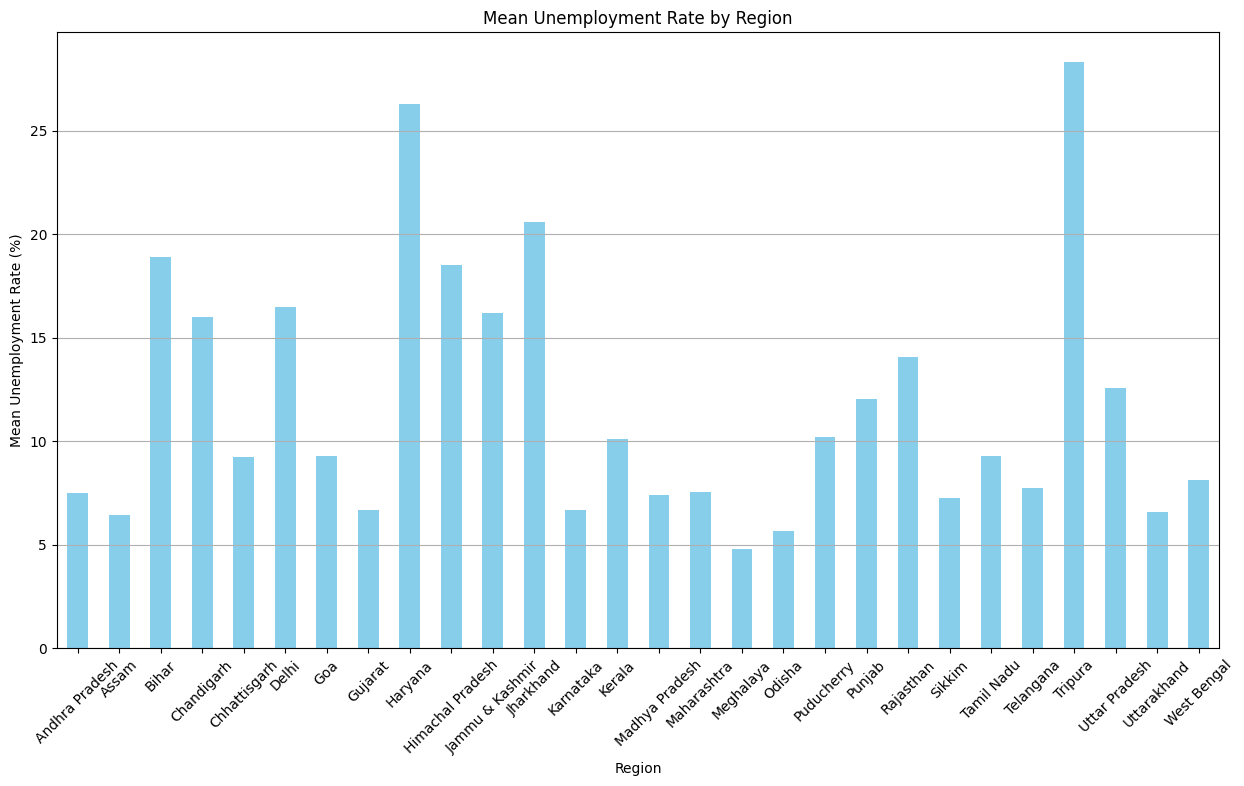

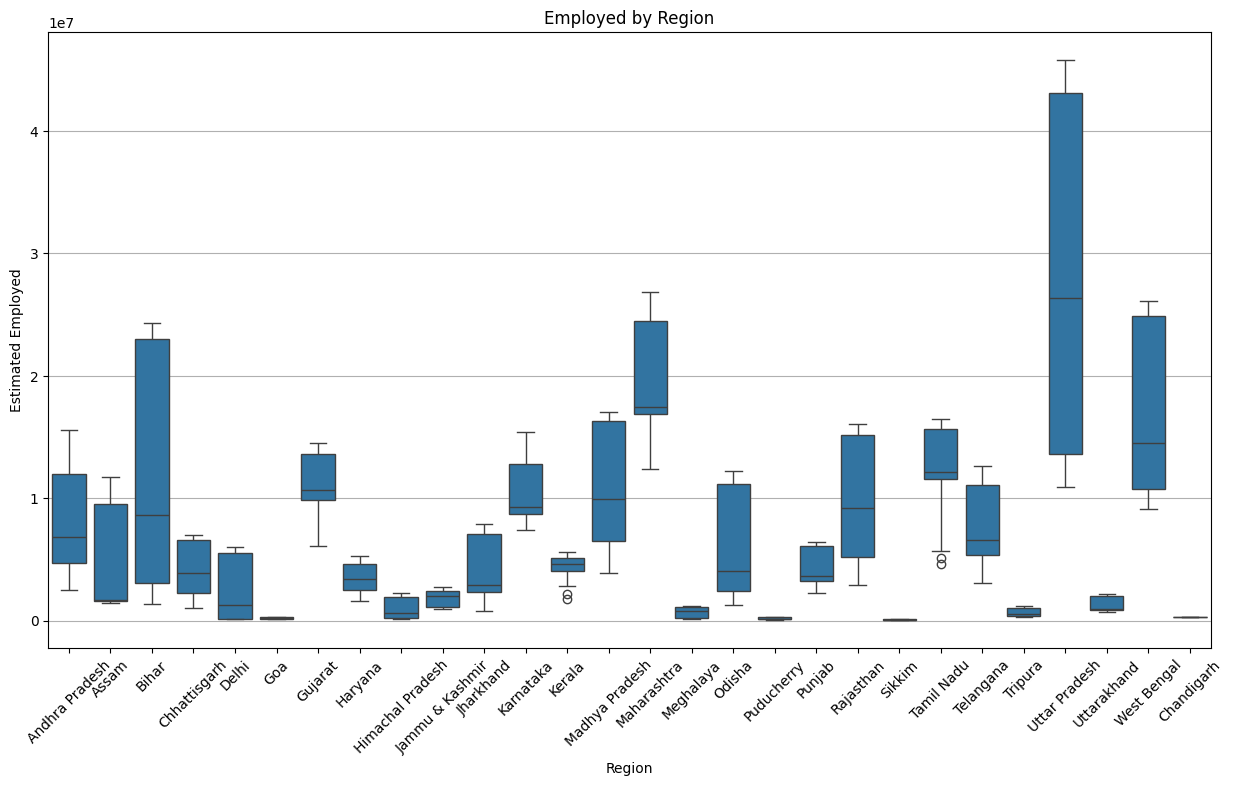

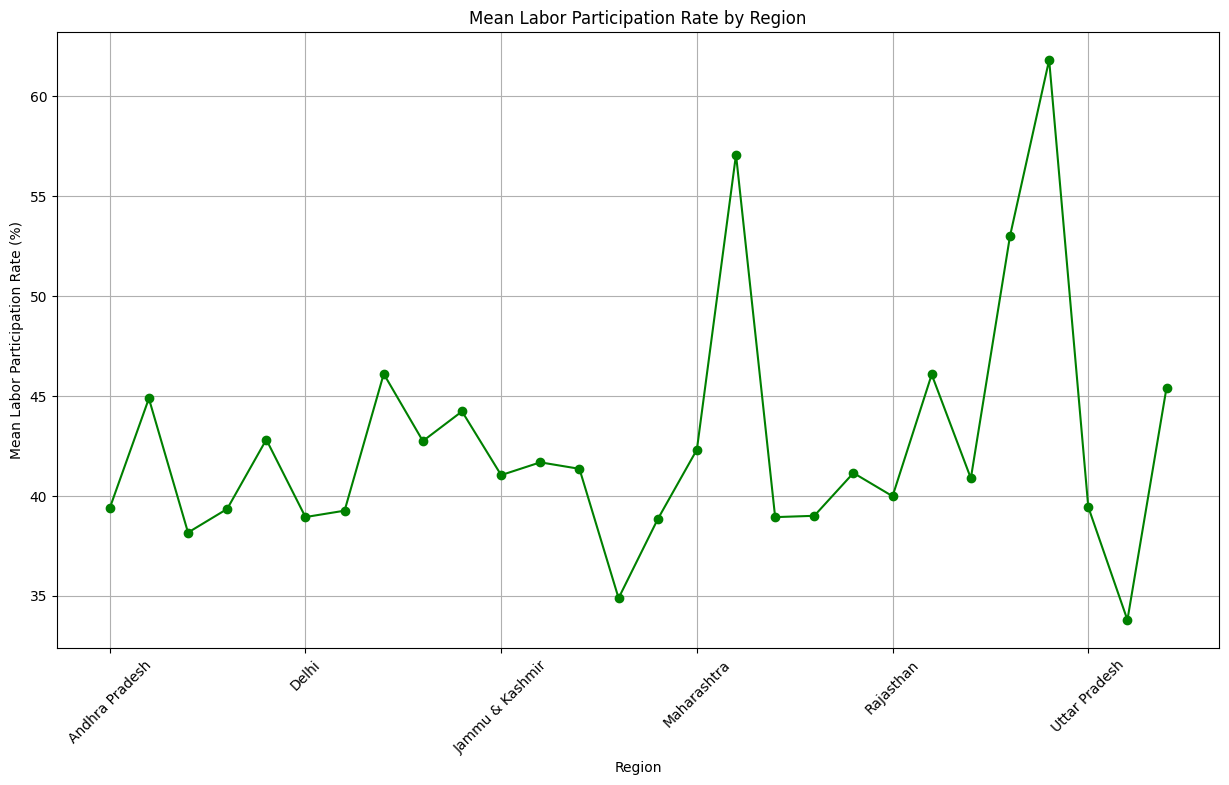

In [ ]:
# Bar plot of mean unemployment rate by region
plt.figure(figsize=(15, 8))
mean_unemployment_rate.plot(kind='bar', color='skyblue')
plt.title('Mean Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Box plot of employed by region
plt.figure(figsize=(15, 8))
sns.boxplot(x='Region', y='Estimated Employed', data=data)
plt.title('Employed by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Line plot of mean labor participation rate by region
plt.figure(figsize=(15, 8))
mean_labor_participation_rate.plot(kind='line', marker='o', color='green')
plt.title('Mean Labor Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Mean Labor Participation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Statistical Tests (Optional): Conduct statistical tests such as ANOVA or t-tests to determine if there are significant differences between regions for specific metrics.

In [ ]:
from scipy.stats import f_oneway

# Example: ANOVA test for unemployment rate across regions
anova_results = f_oneway(*[group['Estimated Unemployment Rate (%)'] for name, group in grouped_data])
print("ANOVA p-value:", anova_results.pvalue)

ANOVA p-value: 3.616584140292138e-47


# DEMOGRAPHIC ANALYSIS

In [ ]:
# Group data by rural or urban area
grouped_demographics = data.groupby('Area')

In [ ]:
# Calculate mean unemployment rate by rural or urban area
mean_unemployment_rate_demographic = grouped_demographics['Estimated Unemployment Rate (%)'].mean()

# Calculate median employed by rural or urban area
median_employed_demographic = grouped_demographics['Estimated Employed'].median()

# Calculate mean labor participation rate by rural or urban area
mean_labor_participation_rate_demographic = grouped_demographics['Estimated Labour Participation Rate (%)'].mean()


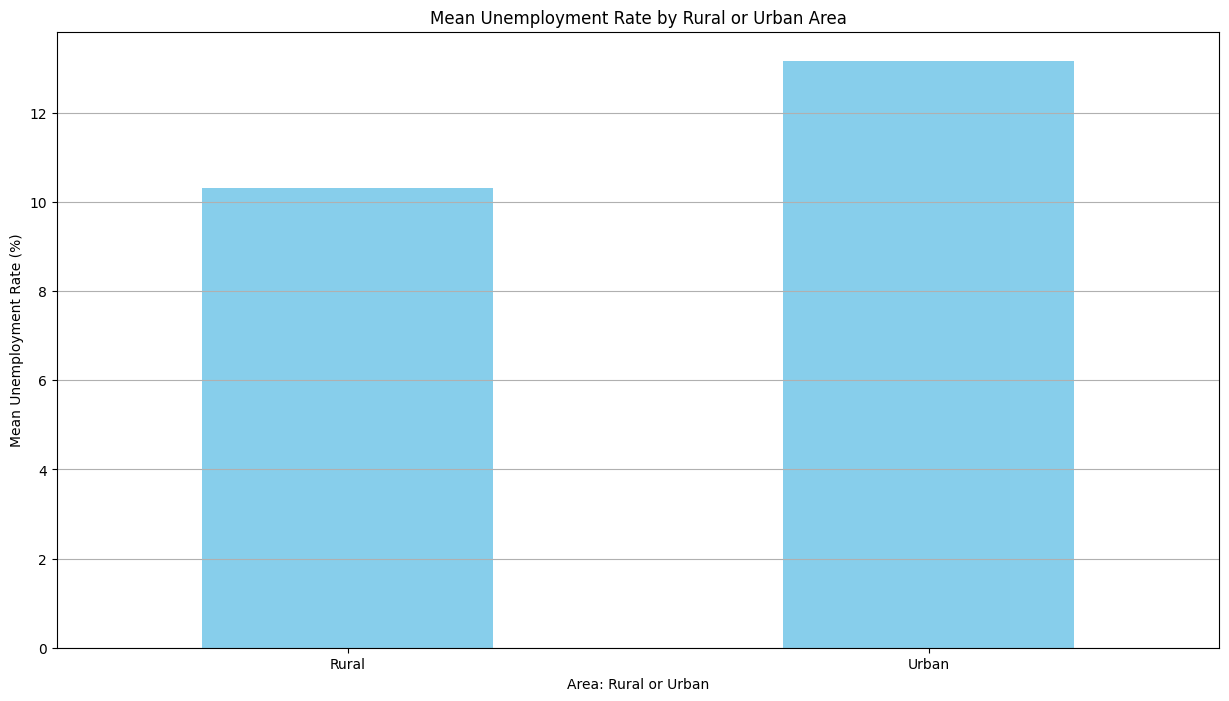

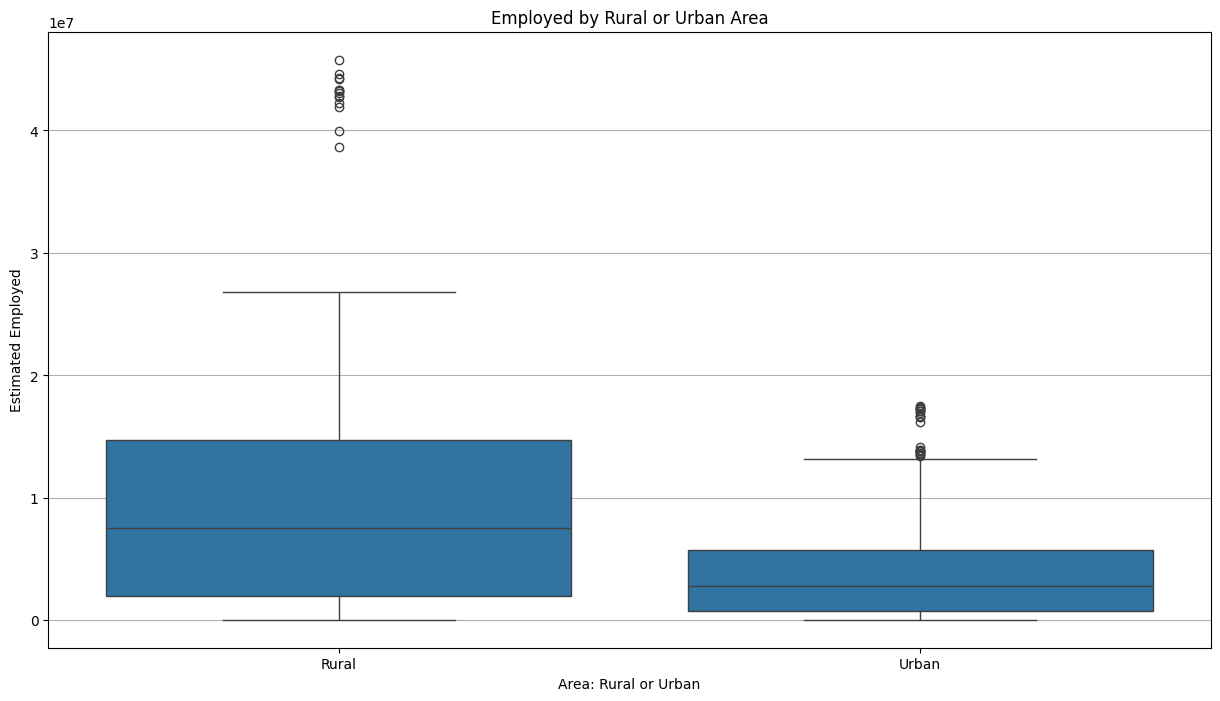

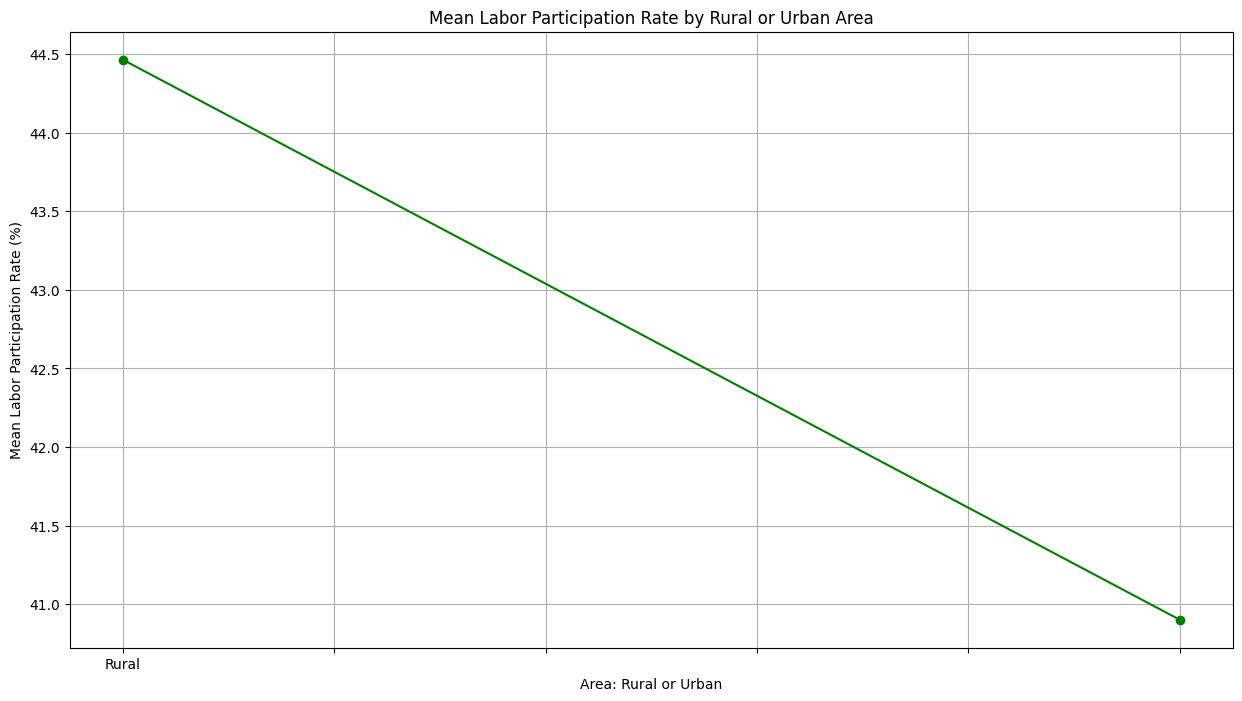

In [ ]:
# Bar plot of mean unemployment rate by rural or urban area
plt.figure(figsize=(15, 8))
mean_unemployment_rate_demographic.plot(kind='bar', color='skyblue')
plt.title('Mean Unemployment Rate by Rural or Urban Area')
plt.xlabel('Area: Rural or Urban')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Box plot of employed by rural or urban area
plt.figure(figsize=(15, 8))
sns.boxplot(x='Area', y='Estimated Employed', data=data)
plt.title('Employed by Rural or Urban Area')
plt.xlabel('Area: Rural or Urban')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Line plot of mean labor participation rate by rural or urban area
plt.figure(figsize=(15, 8))
mean_labor_participation_rate_demographic.plot(kind='line', marker='o', color='green')
plt.title('Mean Labor Participation Rate by Rural or Urban Area')
plt.xlabel('Area: Rural or Urban')
plt.ylabel('Mean Labor Participation Rate (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
